# 1 - FInd S 

In [18]:
import csv
a = []

with open('enjoysport.csv', 'r') as csvfile:
    for row in csv.reader(csvfile):
        a.append(row)
    print(a)

print("\n The total number of training instances are : ",len(a))

num_attribute = len(a[0])-1

print("\n The initial hypothesis is : ")
hypothesis = ['0']*num_attribute
print(hypothesis)

for i in range(0, len(a)):
    if a[i][num_attribute] == 'yes':
        for j in range(0, num_attribute):
            if hypothesis[j] == '0' or hypothesis[j] == a[i][j]:
                hypothesis[j] = a[i][j]
            else:
                hypothesis[j] = '?'
    print("\n The hypothesis for the training instance {} is : \n" .format(i+1),hypothesis)

print("\n The Maximally specific hypothesis for the training instance is ")
print(hypothesis)

[['sky', 'airtemp', 'humidity', 'wind', 'water', 'forcast', 'enjoysport'], ['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes'], ['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes'], ['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no'], ['sunny', 'warm', 'high', 'strong', 'cool', 'change', 'yes']]

 The total number of training instances are :  5

 The initial hypothesis is : 
['0', '0', '0', '0', '0', '0']

 The hypothesis for the training instance 1 is : 
 ['0', '0', '0', '0', '0', '0']

 The hypothesis for the training instance 2 is : 
 ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']

 The hypothesis for the training instance 3 is : 
 ['sunny', 'warm', '?', 'strong', 'warm', 'same']

 The hypothesis for the training instance 4 is : 
 ['sunny', 'warm', '?', 'strong', 'warm', 'same']

 The hypothesis for the training instance 5 is : 
 ['sunny', 'warm', '?', 'strong', '?', '?']

 The Maximally specific hypothesis for the training instance is 
['sunny', 'warm'

# 2 - Candidate Elimination 

In [14]:
import csv
with open('enjoysport.csv', 'r') as csvfile:
    ap = csv.reader (csvfile)
    data = list(ap)
    header = data[0]
    data = data[1:]
    specific = data[0][:-1]
    general = [['?' for i in range(len(specific))] for j in range(len(specific))]
    for i in data:
        if i[-1]=='yes':
            for j in range(len(specific)):
                if i[j] != specific[j]: 
                    specific[j]='?'
                    general[j][j] ='?'
        elif i[-1] == 'no':
            for j in range(len(specific)): 
                if i[j] != specific[j]:
                    general[j][j] = specific[j]
                else:
                    general[j][j] = '?'
        print("Specific Hypothesis:", specific) 
print("\n General Hypothesis: ", general)

Specific Hypothesis: ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
Specific Hypothesis: ['sunny', 'warm', '?', 'strong', 'warm', 'same']
Specific Hypothesis: ['sunny', 'warm', '?', 'strong', 'warm', 'same']
Specific Hypothesis: ['sunny', 'warm', '?', 'strong', '?', '?']

 General Hypothesis:  [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]


# 3 - ID3 algorithm

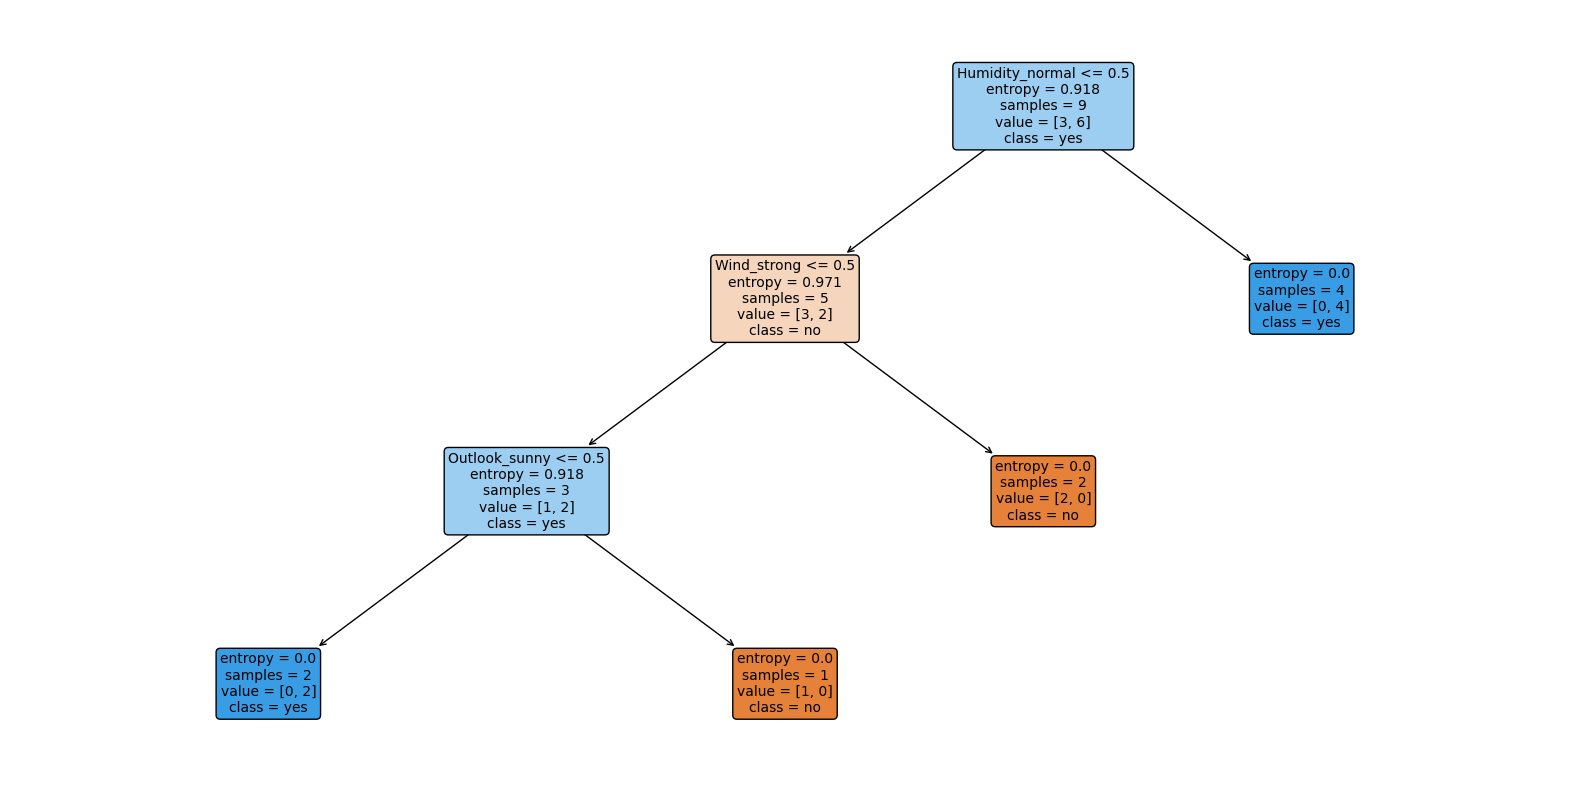

The test instance: ['rain', 'cool', 'normal', 'strong']
The label for test instance: yes
The test instance: ['sunny', 'mild', 'normal', 'strong']
The label for test instance: yes


c:\Users\Neha KB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('id3.csv')
X, y = df.iloc[:, :-1], df.iloc[:, -1]

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)
feature_names = encoder.get_feature_names_out(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=feature_names, class_names=clf.classes_, filled=True, rounded=True, fontsize=10)
plt.show()

test_samples = [['rain', 'cool', 'normal', 'strong'], ['sunny', 'mild', 'normal', 'strong']]
test_samples_encoded = encoder.transform(test_samples)

predictions = clf.predict(test_samples_encoded)

for sample, prediction in zip(test_samples, predictions):
    print(f"The test instance: {sample}")
    print(f"The label for test instance: {prediction}")


# 4 - Backpropagation algorithm 

In [21]:
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float) # two inputs [sleep,study]
y = np.array(([92], [86], [89]), dtype=float) # one output [Expected % in Exams]
X = X/np.amax(X,axis=0) # maximum of X array longitudinally
y = y/100

#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=5000 	#Setting training iterations
lr=0.1 		#Setting learning rate
inputlayer_neurons = 2 		#number of features in data set
hiddenlayer_neurons = 3 	#number of hidden layers neurons
output_neurons = 1 		#number of neurons at output layer

#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons)) #weight of the link from input node to hidden node
bh=np.random.uniform(size=(1,hiddenlayer_neurons)) # bias of the link from input node to hidden node
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons)) #weight of the link from hidden node to output node
bout=np.random.uniform(size=(1,output_neurons)) #bias of the link from hidden node to output node


#draws a random range of numbers uniformly of dim x*y
for i in range(epoch):

#Forward Propogation
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+ bout
    output = sigmoid(outinp)

#Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO * outgrad
    EH = d_output.dot(wout.T)

#how much hidden layer weights contributed to error
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad

# dotproduct of nextlayererror and currentlayero
wh += X.T.dot(d_hiddenlayer) *lr
wout += hlayer_act.T.dot(d_output) *lr

print("Input: \n" + str(X)) 
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.8112543 ]
 [0.80502225]
 [0.81403476]]


# 5 - naïve Bayesian classifier 

In [24]:
import csv
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = pd.read_csv('naivedata.csv')
    
X = data.iloc[:, :-1].values  
y = data.iloc[:, -1].values   
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
print(f'Split {len(data)} rows into train={len(X_train)} and test={len(X_test)} rows')
    
model = GaussianNB()
model.fit(X_train, y_train)
    
y_pred = model.predict(X_test)
    
print(f'Accuracy of the classifier is:{accuracy_score(y_test,y_pred)}')


Split 767 rows into train=536 and test=231 rows
Accuracy of the classifier is:0.7229437229437229


# 6- Bayesian network considering medical data.

In [25]:
import numpy as np
import pandas as pd
import csv 
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination

heartDisease = pd.read_csv('heart.csv')
heartDisease = heartDisease.replace('?',np.nan)

print('Sample instances from the dataset are given below')
print(heartDisease.head())

print('\n Attributes and datatypes')
print(heartDisease.dtypes)

model= BayesianNetwork([('age','heartdisease'),('sex','heartdisease'),('exang','heartdisease'),('cp','heartdisease'),('heartdisease','restecg'),('heartdisease','chol')])
print('\nLearning CPD using Maximum likelihood estimators')
model.fit(heartDisease,estimator=MaximumLikelihoodEstimator)

print('\n Inferencing with Bayesian Network:')
HeartDiseasetest_infer = VariableElimination(model)

print('\n 1. Probability of HeartDisease given evidence= restecg')
q1=HeartDiseasetest_infer.query(variables=['heartdisease'],evidence={'restecg':1})
print(q1)

print('\n 2. Probability of HeartDisease given evidence= cp ')
q2=HeartDiseasetest_infer.query(variables=['heartdisease'],evidence={'cp':2})
print(q2)

Sample instances from the dataset are given below
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  heartdisease  
0  0    6             0  
1  3    3             2  
2  2    7             1  
3  0    3             0  
4  0    3             0  

 Attributes and datatypes
age               int64
sex               int64
cp                int64
trestbps          int64
chol              int64
fbs               int64
restecg           int64
thalach           int64
exang             int64
oldpeak         float64
slope             int64
ca              

# 7- EM algorithm to cluster a set of data - K means algo 

c:\Users\Neha KB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The accuracy score of K-Mean:  0.24
The Confusion matrixof K-Mean:  [[ 0 50  0]
 [48  0  2]
 [14  0 36]]
The accuracy score of EM:  0.9666666666666667
The Confusion matrix of EM:  [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]


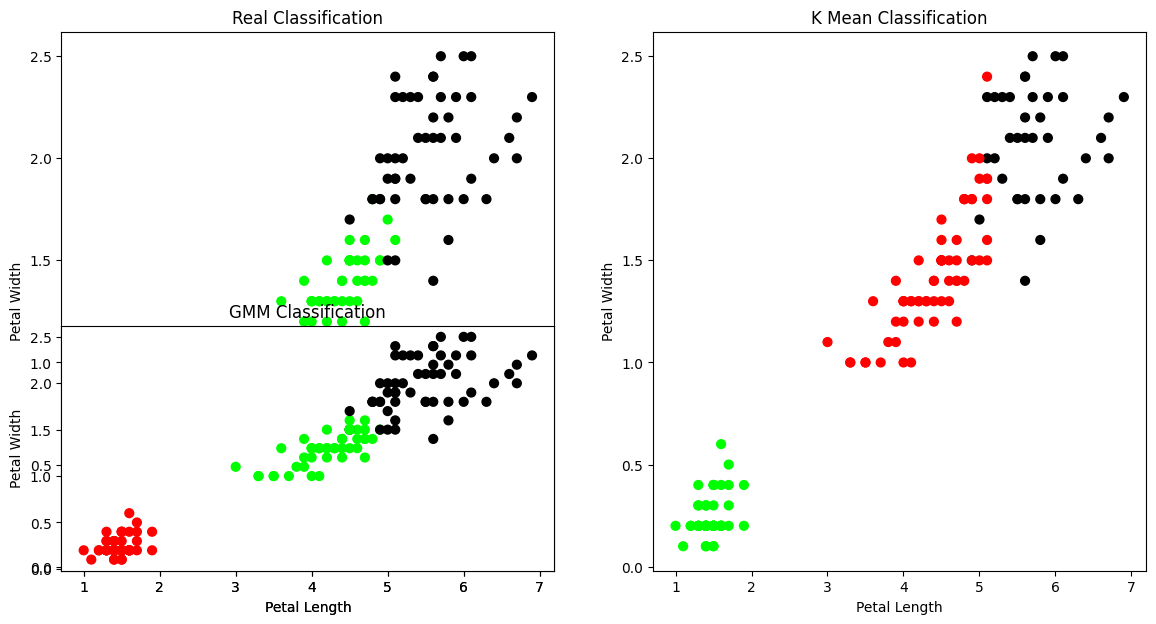

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

model = KMeans(n_clusters=3)
model.fit(X)

plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean: ',sm.confusion_matrix(y, model.labels_))

scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)

gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_gmm = gmm.predict(xs)

plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('The accuracy score of EM: ',sm.accuracy_score(y, y_gmm))
print('The Confusion matrix of EM: ',sm.confusion_matrix(y, y_gmm))

# 8- k-Nearest Neighbour algorithm to classify the iris data set

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets

iris=datasets.load_iris()

x = iris.data
y = iris.target

print ('sepal-length', 'sepal-width', 'petal-length', 'petal-width')
print(x)
print('class: 0-Iris-Setosa, 1- Iris-Versicolour, 2- Iris-Virginica')
print(y)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

#To Training the model and Nearest nighbors K=5
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

#To make predictions on our test data
y_pred=classifier.predict(x_test)

print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Accuracy Metrics')
print(classification_report(y_test,y_pred)) 

sepal-length sepal-width petal-length petal-width
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]


# 9- non-parametric Locally Weighted Regression algorithm in order to fit data points

In [26]:
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.io import push_notebook

def local_regression(x0, X, Y, tau):
 x0 = np.r_[1, x0] 
 X = np.c_[np.ones(len(X)), X]
 xw = X.T * radial_kernel(x0, X, tau) 
 beta = np.linalg.pinv(xw @ X) @ xw @ Y 
 return x0 @ beta

def radial_kernel(x0, X, tau):
 return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))

n = 1000
X = np.linspace(-3, 3, num=n)
print("The Data Set ( 10 Samples) X :\n",X[1:10])
Y = np.log(np.abs(X ** 2 - 1) + .5)
print("The Fitting Curve Data Set (10 Samples) Y :\n",Y[1:10])

X += np.random.normal(scale=.1, size=n)
print("Normalised (10 Samples) X :\n",X[1:10])

domain = np.linspace(-3, 3, num=300)
print("Xo Domain Space(10 Samples) :\n",domain[1:10])

def plot_lwr(tau):
 prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
 plot = figure(width=400, height=400)
 plot.title.text='tau=%g' % tau
 plot.scatter(X, Y, alpha=.3)
 plot.line(domain, prediction, line_width=2, color='red')
 return plot

show(gridplot([
 [plot_lwr(10.), plot_lwr(1.)],
 [plot_lwr(0.1), plot_lwr(0.01)]]))

The Data Set ( 10 Samples) X :
 [-2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997 -2.96396396
 -2.95795796 -2.95195195 -2.94594595]
The Fitting Curve Data Set (10 Samples) Y :
 [2.13582188 2.13156806 2.12730467 2.12303166 2.11874898 2.11445659
 2.11015444 2.10584249 2.10152068]
Normalised (10 Samples) X :
 [-2.89534593 -3.16400994 -2.90408877 -2.96028782 -2.91563969 -2.98423624
 -2.78386495 -2.87613574 -3.02196763]
Xo Domain Space(10 Samples) :
 [-2.97993311 -2.95986622 -2.93979933 -2.91973244 -2.89966555 -2.87959866
 -2.85953177 -2.83946488 -2.81939799]


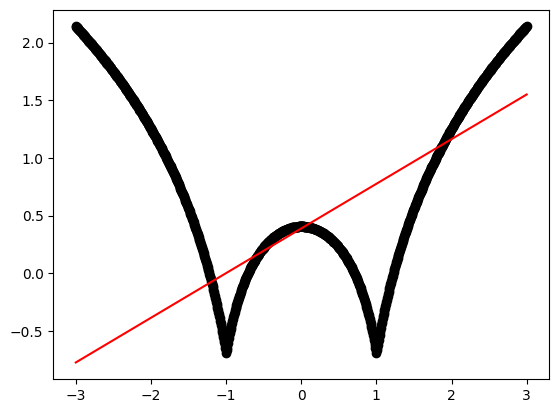

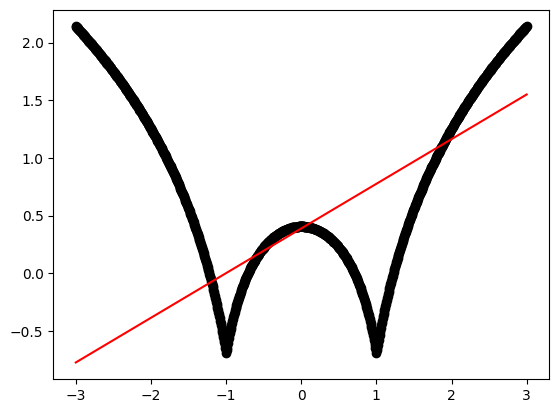

c:\Users\Neha KB\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\linalg\linalg.py:2027: RuntimeWarning: overflow encountered in divide
  s = divide(1, s, where=large, out=s)
C:\Users\Neha KB\AppData\Local\Temp\ipykernel_14700\1314303640.py:8: RuntimeWarning: invalid value encountered in matmul
  beta = np.linalg.pinv(xw @ X) @ xw @ Y @ x0


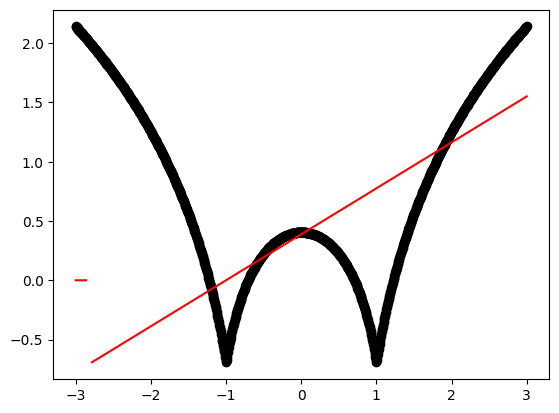

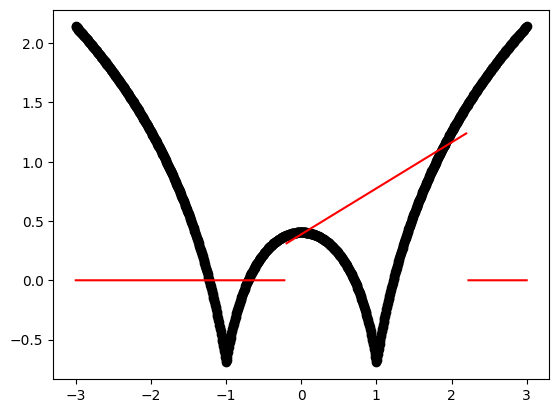

In [17]:
import numpy as np
from matplotlib import pyplot as plt
def local_regression (x0, X, Y, tau):
    x0 = [1, x0]
    X = [[1, 1] for i in X]
    X = np.asarray(X)
    xw = (X.T) * np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau))
    beta = np.linalg.pinv(xw @ X) @ xw @ Y @ x0 
    return beta

def draw(tau):
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain] 
    plt.plot(X, Y, 'o', color='black')
    plt.plot(domain, prediction, color='red')
    plt.show()
X = np.linspace (-3, 3, num=1000)
domain = X
Y = np.log(np.abs (X ** 2 - 1)+.5)
draw(10)
draw(0.1)
draw(0.01)
draw(0.001)

# 10

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

dataset = pd.read_csv('data.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[102   5]
 [  5  59]]


0.9415204678362573